## MSDS 432 - Programming Assignment #9 Dan Avni

The purpose of this programming assignment is 

In [21]:
#import required packages
import numpy as np
import pandas as pd
import time

In [6]:
#adapted from: https://www.sanfoundry.com/dynamic-programming-solutions-edit-distance-problem/

def min_edit_distance_brute(src, dest, len1, len2):
    #if we have already attained the dest string, we can simply remove the left out characters in src string    
    if len2==0:
        return len1
 
    #if the entire src string is process, we can simply insert all the remaining characters of dest string
    if len1==0:
        return len2
 
    #if current character of the src and dest is same, no operation is required to be done
    if src[len1-1]==dest[len2-1]:
        return min_edit_distance_brute(src, dest, len1-1, len2-1)
    #if current character is different for src and dest string
    else:
        #if the required character of dest string is inserted in src string
        x=1+min_edit_distance_brute(src,dest,len1,len2-1)
 
        #if the current character of src is removed
        y=1+min_edit_distance_brute(src,dest,len1-1,len2)
 
        #if the current character of the src string is replaced with the current character of the dest string
        z=1+min_edit_distance_brute(src,dest,len1-1,len2-1)
 
        #now, choose the operation which require minimum number of overall operations out of these
        return min(x,min(y,z))

In [2]:
#adapted from: https://www.sanfoundry.com/dynamic-programming-solutions-edit-distance-problem/
def min_edit_distance(src, dest):
    len1, len2 = len(src), len(dest)
 
    #create a matrix of order (len1+1)*(len2+1) to memoize values
    edit = np.empty([len1+1,len2+1], dtype=int)
 
    #edit[i][j]=minimum number of edit operations required to transform src[0....(i-1)] to dest[0...(j-1)]
 
    for i in range(0, len1+1):
        edit[i][0]=i    #min operations required to transform src[0...i-1] to empty dest string
 
    for j in range(0, len2+1):
        edit[0][j]=j   #min operations required to transform empty src to dest[0...j-1]
 
    #now, start filling the matrix row wise
    for i in range(1, len1+1):
        for j in range(1, len2+1):
            #if current character of both strings match
            if(src[i-1]==dest[j-1]):            
                edit[i][j]=edit[i-1][j-1]
            #mismatch
            else:
                #try applying all operations and choose the one which costs minimum
                x=1+edit[i-1][j];    #delete 
                y=1+edit[i][j-1];    #insert
                z=1+edit[i-1][j-1];  #replace
                edit[i][j]=min(x,min(y,z))
                
    #now, return the final value 
    return edit[len1][len2];

In [3]:
#unit test for DP 
min_edit_distance("danny", "mika")

5

In [8]:
#unit test for brute force
min_edit_distance_brute("mika", "danny", 4, 5)

5

In [16]:
sentence = "the quick brown fox jumped over the lazy dog"

In [17]:
words = sentence.split(" ")

In [23]:
test_results_col_names = ['method', 'word1', 'word2', 'edit_distance', 'runtime_ms']
test_results           = pd.DataFrame(columns = test_results_col_names) 

In [25]:
for i in range(0, len(words)):
    for j in range(0, len(words)):
        if (i != j):
            word1 = words[i]
            word2 = words[j]
            
            start   = time.time()
            dist = min_edit_distance(word1, word2)
            runtime_ms = ((time.time() - start) * 1000)
            test_results.loc[len(test_results)] = ['Dynamic Programming Edit Distance', word1, word2, dist, runtime_ms]
            
            start   = time.time()
            dist = min_edit_distance_brute(word1, word2, len(word1), len(word2))
            runtime_ms = ((time.time() - start) * 1000)
            test_results.loc[len(test_results)] = ['Brute Force Edit Distance', word1, word2, dist, runtime_ms]


In [26]:
test_results

,method,word1,word2,edit_distance,runtime_ms
0,Dynamic Programming Edit Distance,the,quick,5,0.080585
1,Brute Force Edit Distance,the,quick,5,0.191212
2,Dynamic Programming Edit Distance,the,brown,5,0.126839
3,Brute Force Edit Distance,the,brown,5,0.203848
4,Dynamic Programming Edit Distance,the,fox,3,0.062704
5,Brute Force Edit Distance,the,fox,3,0.074148
6,Dynamic Programming Edit Distance,the,jumped,5,0.073433
7,Brute Force Edit Distance,the,jumped,5,0.103474
8,Dynamic Programming Edit Distance,the,over,3,0.054836
9,Brute Force Edit Distance,the,over,3,0.051260


In [27]:
dp_mean = test_results.loc[test_results['method']=='Dynamic Programming Edit Distance', 'runtime_ms'].mean()

In [28]:
dp_mean

0.0654757022857666

In [30]:
bf_mean = test_results.loc[test_results['method']=='Brute Force Edit Distance', 'runtime_ms'].mean()

In [31]:
bf_mean

0.23872322506374782

In [32]:
import seaborn as sns

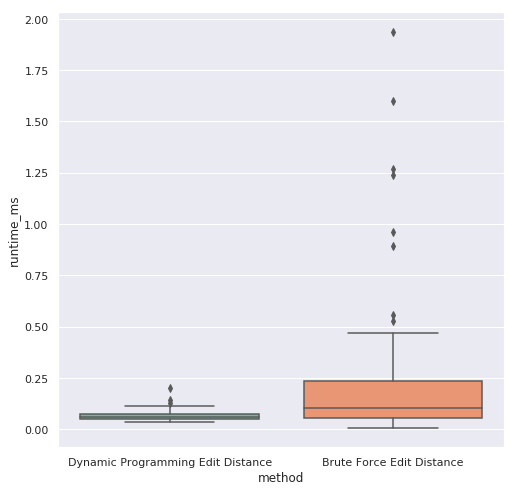

In [33]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.boxplot(x="method", y="runtime_ms", data=test_results, palette="Set2")